In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from wordcloud import WordCloud
from collections import Counter

In [2]:
# Nạp dữ liệu
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
# df = pd.read_csv('D:/PROJECT/Classification_Status/Data/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None) #thay đổi đường dẫn tới file dữ liệuliệuc
# Đặt tên cho các cột
df.columns = ['target', 'id', 'date', 'query', 'user', 'text']

# Xem trước dữ liệu
df.head()

# Giữ lại 2 cột quan trọng là 'polarity' và 'text'
df = df[['target', 'text']]



In [3]:
# Loại bỏ các ký tự đặc biệt, số và chuyển thành chữ thường
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Loại bỏ URL
    text = re.sub(r'\@\w+|\#', '', text)  # Loại bỏ @ và #
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Chỉ giữ lại chữ cái
    text = text.lower()  # Chuyển thành chữ thường
    return text

df['clean_text'] = df['text'].apply(clean_text)

# Loại bỏ các stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if isinstance(text, str):  # Kiểm tra nếu text là chuỗi
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word not in stop_words]
        return ' '.join(filtered_tokens)
    else:
        return ''  

df['clean_text'] = df['clean_text'].apply(remove_stopwords)

# Xem dữ liệu sau khi làm sạch
df.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


In [4]:
# # Tách các câu tích cực và tiêu cực
# negative_texts = df['clean_text'][:800000].dropna().astype(str)  # 800,000 dòng đầu tiên là tiêu cực
# positive_texts = df['clean_text'][800000:].dropna().astype(str)  # 800,000 dòng tiếp theo là tích cực

# # Đếm tần suất từ vựng
# positive_words = ' '.join(positive_texts).split()
# negative_words = ' '.join(negative_texts).split()

# # Đếm số lượng từ phổ biến nhất
# positive_word_freq = Counter(positive_words)
# negative_word_freq = Counter(negative_words)

# # 10 từ phổ biến nhất trong câu tích cực
# print("Top 10 từ phổ biến trong các câu tích cực:")
# print(positive_word_freq.most_common(10))

# # 10 từ phổ biến nhất trong câu tiêu cực
# print("Top 10 từ phổ biến trong các câu tiêu cực:")
# print(negative_word_freq.most_common(10))


In [5]:
from collections import Counter

negative_texts = df['clean_text'][:50].dropna().astype(str)  
positive_texts = df['clean_text'][800000:800000+50].dropna().astype(str)  

# Đếm tần suất từ vựng
positive_words = ' '.join(positive_texts).split()
negative_words = ' '.join(negative_texts).split()

# Đếm số lượng từ phổ biến nhất
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

# 10 từ phổ biến nhất trong câu tích cực
print("Top 10 từ phổ biến trong các câu tích cực:")
print(positive_word_freq.most_common(10))

# 10 từ phổ biến nhất trong câu tiêu cực
print("Top 10 từ phổ biến trong các câu tiêu cực:")
print(negative_word_freq.most_common(10))


Top 10 từ phổ biến trong các câu tích cực:
[('love', 4), ('tonight', 4), ('thanks', 4), ('twitter', 4), ('dont', 4), ('new', 4), ('im', 3), ('show', 3), ('really', 3), ('already', 3)]
Top 10 từ phổ biến trong các câu tiêu cực:
[('im', 7), ('sad', 7), ('like', 5), ('time', 5), ('day', 4), ('see', 4), ('didnt', 4), ('one', 4), ('dont', 4), ('got', 3)]


In [6]:
import nltk
nltk.download('averaged_perceptron_tagger')

# Hàm để lấy POS tags
def pos_tagging(texts):
    all_tags = []
    for text in texts:
        tokens = word_tokenize(text)
        tags = pos_tag(tokens)
        all_tags.extend([tag for word, tag in tags])
    return all_tags

# POS tagging cho câu tích cực và tiêu cực
positive_pos_tags = pos_tagging(positive_texts)
negative_pos_tags = pos_tagging(negative_texts)

# Đếm tần suất POS tags
positive_pos_freq = Counter(positive_pos_tags)
negative_pos_freq = Counter(negative_pos_tags)

# Xem các POS tags phổ biến
print("Top POS tags trong câu tích cực:")
print(positive_pos_freq.most_common(10))

print("Top POS tags trong câu tiêu cực:")
print(negative_pos_freq.most_common(10))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Top POS tags trong câu tích cực:
[('NN', 151), ('JJ', 68), ('NNS', 29), ('VBG', 27), ('RB', 23), ('VB', 20), ('VBP', 18), ('VBD', 17), ('VBN', 6), ('CD', 4)]
Top POS tags trong câu tiêu cực:
[('NN', 140), ('JJ', 63), ('NNS', 27), ('RB', 27), ('VBP', 18), ('VBD', 18), ('VBG', 16), ('VB', 15), ('IN', 8), ('VBN', 6)]


Số từ tích cực: 302
Số từ tiêu cực: 272


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


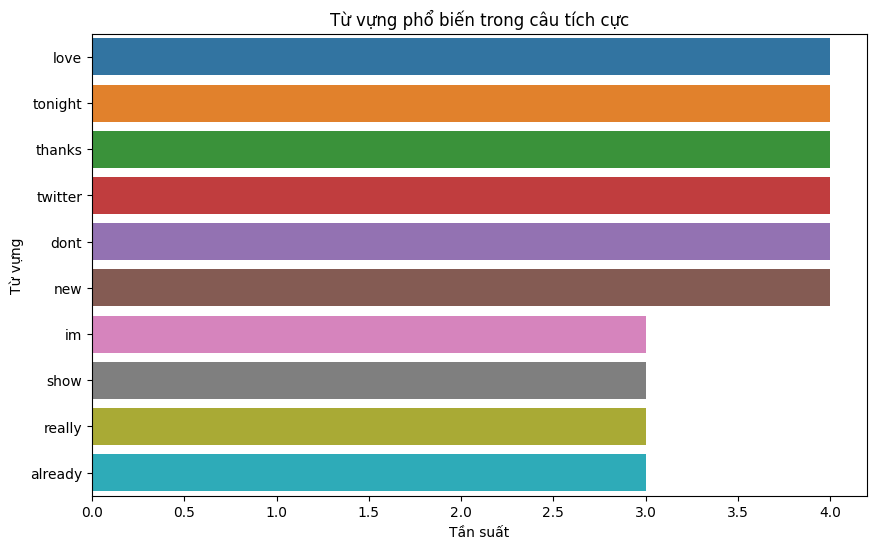

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


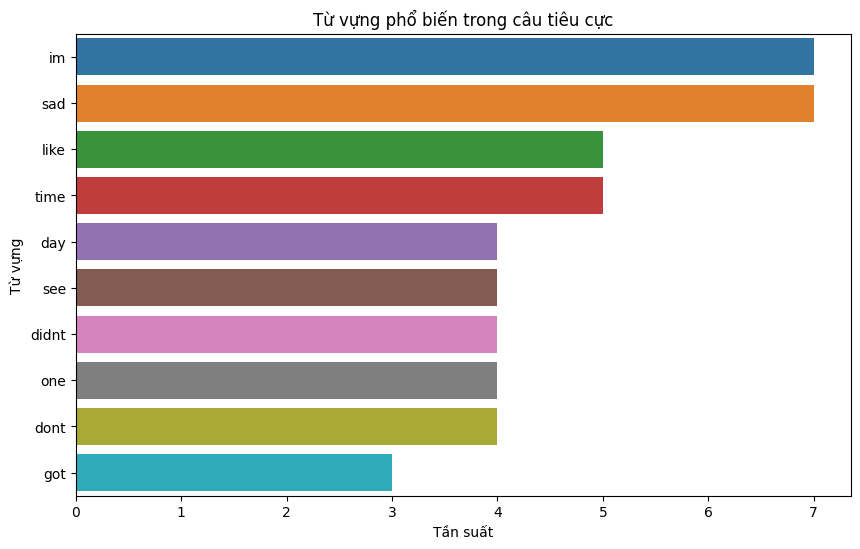

In [7]:
# Trực quan hóa từ vựng phổ biến bằng seaborn
def plot_word_frequency(word_freq, title):
    # Lấy 10 từ phổ biến nhất
    common_words = word_freq.most_common(10)
    if not common_words:  # Kiểm tra nếu không có từ nào
        print("Không có từ nào để hiển thị.")
        return

    words = [word for word, freq in common_words]
    freqs = [freq for word, freq in common_words]

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    sns.barplot(x=freqs, y=words)
    plt.title(title)
    plt.xlabel('Tần suất')
    plt.ylabel('Từ vựng')
    plt.show()
    
print("Số từ tích cực:", len(positive_word_freq))
print("Số từ tiêu cực:", len(negative_word_freq))
# Biểu đồ cho từ vựng tích cực
plot_word_frequency(positive_word_freq, 'Từ vựng phổ biến trong câu tích cực')

# Biểu đồ cho từ vựng tiêu cực
plot_word_frequency(negative_word_freq, 'Từ vựng phổ biến trong câu tiêu cực')


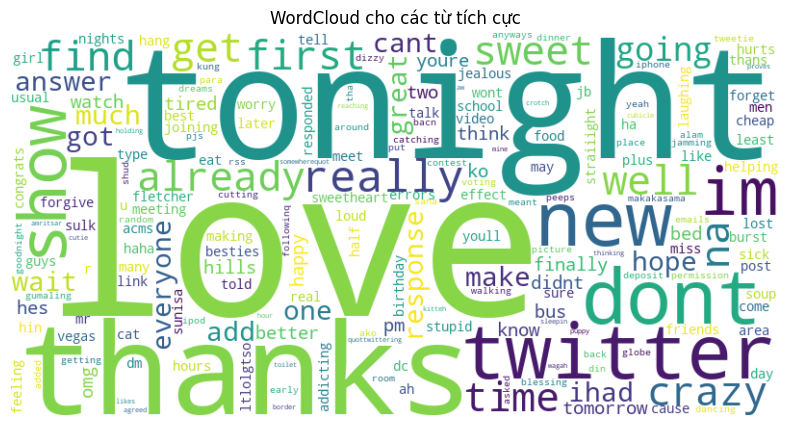

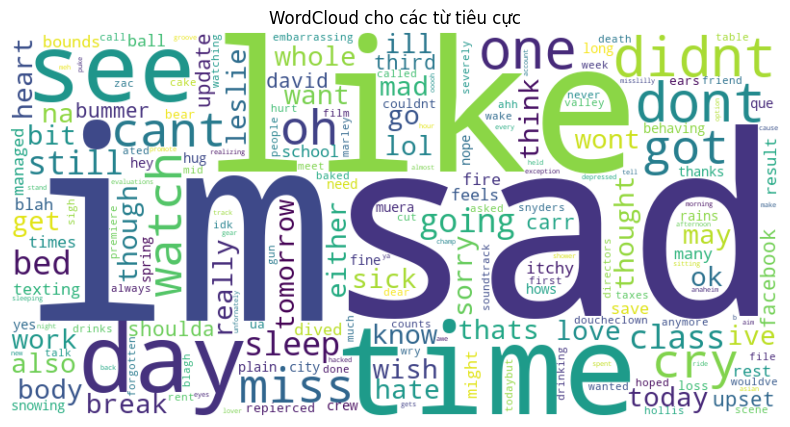

In [8]:
# Tạo WordCloud
def create_wordcloud(word_freq, title):
    if not word_freq:  # Kiểm tra nếu không có từ nào
        print("Không có từ nào để tạo WordCloud.")
        return

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Tắt trục
    plt.title(title)
    plt.show()

# WordCloud cho từ vựng tích cực
create_wordcloud(positive_word_freq, 'WordCloud cho các từ tích cực')

# WordCloud cho từ vựng tiêu cực
create_wordcloud(negative_word_freq, 'WordCloud cho các từ tiêu cực')


In [9]:
!pip install transformers
!pip install datasets

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

In [11]:
# Chuyển đổi nhãn 4 thành 1
df['target'] = df['target'].replace(4, 1)
# Kiểm tra lại nhãn trong toàn bộ DataFrame
print("Unique labels in dataset:", set(df['target']))

# Đếm số lượng dữ liệu tích cực (nhãn 1) và tiêu cực (nhãn 0)
label_counts = df['target'].value_counts()

print("Số lượng dữ liệu tích cực và tiêu cực:")
print(label_counts)

# Tách số liệu cụ thể
positive_count = label_counts[1]  # Dữ liệu tích cực (nhãn 1)
negative_count = label_counts[0]  # Dữ liệu tiêu cực (nhãn 0)

print(f"Số lượng dữ liệu tích cực: {positive_count}")
print(f"Số lượng dữ liệu tiêu cực: {negative_count}")




Unique labels in dataset: {0, 1}
Số lượng dữ liệu tích cực và tiêu cực:
target
0    800000
1    800000
Name: count, dtype: int64
Số lượng dữ liệu tích cực: 800000
Số lượng dữ liệu tiêu cực: 800000


In [12]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['clean_text'].tolist(),
    df['target'].tolist(),
    test_size=0.2,
    random_state=42
)


In [13]:
# Tải tokenizer và mô hình BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Token hóa dữ liệu
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=250)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=250)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
# Chuyển đổi thành định dạng tensor
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [15]:
train_dataset = SentimentDataset(train_encodings, train_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)

In [16]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    acc = accuracy_score(p.label_ids, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


In [17]:
!pip install pytorch-optimizer

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 9.2 MB/s eta 0:00:00


In [18]:
import torch
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback, AdamW, get_scheduler
from pytorch_optimizer import RAdam
# from torch.optim.lr_scheduler import CosineAnnealingLR
# Kiểm tra GPU có sẵn không
print(torch.cuda.is_available())  
print(torch.cuda.device_count())  

# Định nghĩa các tham số cho huấn luyện
training_args = TrainingArguments(
    output_dir='./results',                
    report_to="none",                     
    num_train_epochs=3,                   
    per_device_train_batch_size=16,        
    per_device_eval_batch_size=16,        
    warmup_steps=200,                     
    weight_decay=0.01,                    
    logging_dir='./logs',                 
    learning_rate=1e-5,                   
    adam_beta1=0.9,                       
    adam_beta2=0.999,                     
    adam_epsilon=1e-8,                    
    logging_steps=10,                     
    evaluation_strategy="steps",          
    save_steps=500,                       
    eval_steps=500,                       
    load_best_model_at_end=True,  
    metric_for_best_model="accuracy",           
    greater_is_better=True, 
    save_total_limit=2                    
)

# Thêm EarlyStoppingCallback
callbacks = [EarlyStoppingCallback(early_stopping_patience=2)]

# Tạo optimizer và scheduler cho mô hình
optimizer = RAdam([
    {'params': model.bert.encoder.layer[:6].parameters(), 'lr': 5e-5},
    {'params': model.bert.encoder.layer[6:9].parameters(), 'lr': 3e-5},
    {'params': model.bert.encoder.layer[9:].parameters(), 'lr': 2e-5},
    {'params': model.classifier.parameters(), 'lr': 2e-5}
], betas=(0.9, 0.999),weight_decay=0.001)

# Tính số bước huấn luyện
num_training_steps = len(train_dataset) // training_args.per_device_train_batch_size * training_args.num_train_epochs

# Tạo scheduler cho learning rate
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=training_args.warmup_steps,
    num_training_steps=num_training_steps
)

# Khởi tạo Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,          
    eval_dataset=test_dataset,  
    compute_metrics=compute_metrics,
    callbacks=callbacks,                  
    optimizers=(optimizer, lr_scheduler)  
)


True
1


/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [19]:
# Bước 1: Huấn luyện mô hình
trainer.train()

# Bước 2: Dự đoán nhãn cho tập kiểm tra
predictions, labels, _ = trainer.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)

# Bước 3: Tạo bảng so sánh giữa nhãn gốc và nhãn dự đoán
comparison_df = pd.DataFrame({
    'Original_Text': test_texts,           # Câu gốc từ tập kiểm tra
    'Original_Label': test_labels,         # Nhãn gốc từ cột target
    'Predicted_Label': predictions         # Nhãn dự đoán từ BERT
})

# In ra 20 dòng đầu tiên của bảng so sánh
print(comparison_df.head(20))

# Xuất ra file CSV để kiểm tra
comparison_df.to_csv('bert_comparison_results.csv', index=False)

# Bước 4: In báo cáo phân loại
print(classification_report(test_labels, predictions))

trainer.save_model("./best_model") 

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
500,0.430600,0.547429,0.743897,0.741716,0.752879,0.743897
1000,0.465400,0.493629,0.761466,0.761020,0.763230,0.761466
1500,0.464400,0.495286,0.761344,0.759600,0.768737,0.761344
2000,0.473000,0.506097,0.762791,0.761244,0.769390,0.762791
2500,0.460900,0.498444,0.765000,0.763106,0.774210,0.765000
3000,0.511600,0.472518,0.776709,0.776706,0.776713,0.776709
3500,0.435000,0.470362,0.772012,0.770936,0.777574,0.772012
4000,0.505400,0.465413,0.779388,0.779388,0.779393,0.779388
4500,0.530200,0.460778,0.782825,0.782801,0.783009,0.782825
5000,0.489900,0.471851,0.768866,0.767146,0.777493,0.768866


                                        Original_Text  Original_Label  \
0                                        ahhh hope ok               0   
1                                cool tweet apps razr               0   
2   know family drama lamehey next time u hang kim...               0   
3   school email wont open geography stuff revise ...               0   
4                               upper airways problem               0   
5                     going miss pastors sermon faith               0   
6                                    lunchdj come eat               1   
7                                     oh feeling like               0   
8              gahh noopeyton needs livethis horrible               0   
9   thank glad like product review bit site enjoy ...               1   
10            zach makes pee sitting im grown gay man               1   
11                          sum day one word kackered               1   
12                            great minds think ali

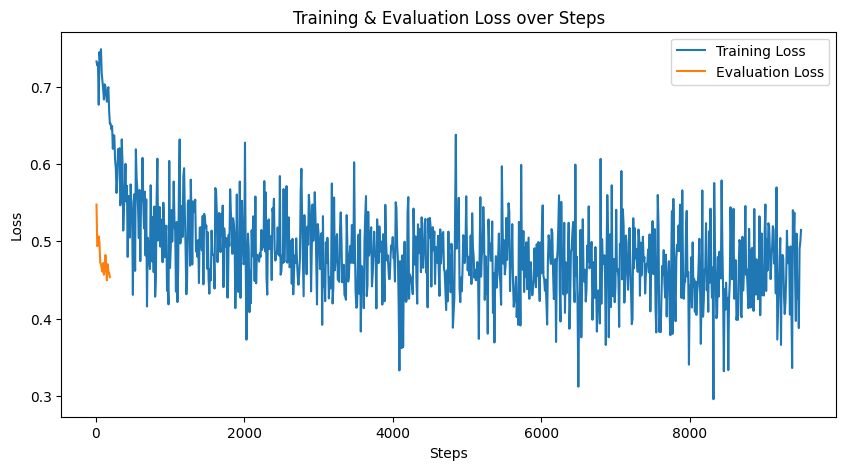

In [20]:
import matplotlib.pyplot as plt

# Lấy các giá trị loss từ log_history
train_loss = []
eval_loss = []
steps = []  # Số bước log

# Duyệt qua log_history và lấy loss và eval_loss cùng với steps
for log in trainer.state.log_history:
    if 'loss' in log:
        train_loss.append(log['loss'])
        steps.append(log['step'])  # Lưu số bước tương ứng với loss
    if 'eval_loss' in log:
        eval_loss.append(log['eval_loss'])

# Vẽ biểu đồ Loss theo Steps (thay vì Epochs)
plt.figure(figsize=(10, 5))
plt.plot(steps, train_loss, label='Training Loss')
plt.plot(steps[:len(eval_loss)], eval_loss, label='Evaluation Loss')  # Cắt eval_loss nếu cần
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training & Evaluation Loss over Steps')
plt.legend()
plt.show()


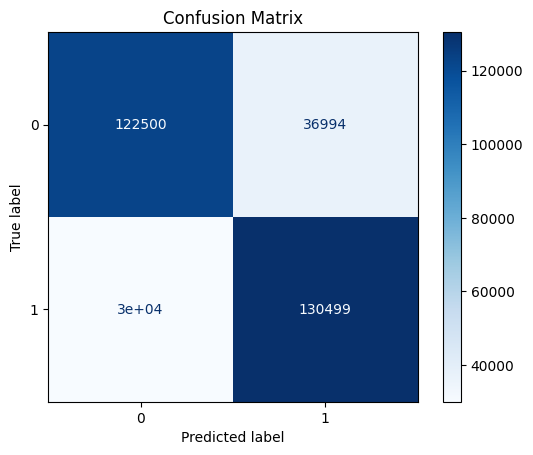

Accuracy: 0.7906
Precision: 0.7911
Recall: 0.7906
F1 Score: 0.7905
AUC-ROC: 0.7906


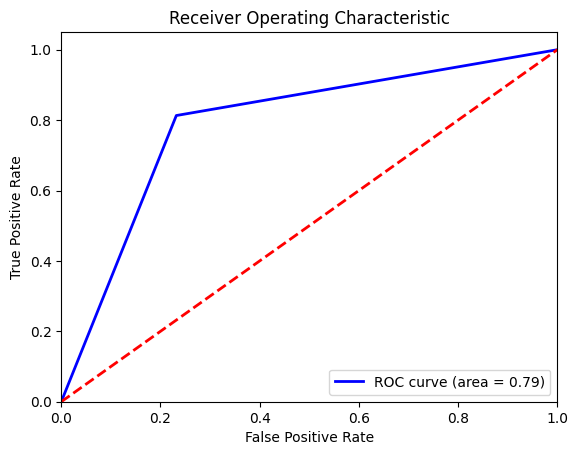

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np# Bước 5: Tính toán confusion matrix
cm = confusion_matrix(test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Tính toán độ chính xác
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Tính toán precision, recall, và f1-score
precision = precision_score(test_labels, predictions, average='weighted')
recall = recall_score(test_labels, predictions, average='weighted')
f1 = f1_score(test_labels, predictions, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Tính toán AUC-ROC
roc_auc = roc_auc_score(test_labels, predictions)
print(f"AUC-ROC: {roc_auc:.4f}")

# Vẽ biểu đồ ROC
fpr, tpr, _ = roc_curve(test_labels, predictions)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()